In [4]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'Data/combined_features_disorder.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the column names
data.head(20)


FileNotFoundError: [Errno 2] No such file or directory: 'Data/combined_features_disorder.csv'

In [ ]:
print(data.isna().sum())
print(len(data))

cleaned_data = data.dropna()

In [ ]:
print(cleaned_data.isna().sum())
print(len(cleaned_data))

In [ ]:
# Drop duplicate rows
cleaned_data_super = cleaned_data.drop_duplicates()
print(len(cleaned_data_super))

In [ ]:
#Filter rows where the 'title' column contains 'Monkberry Moon Delight'
filtered_data = cleaned_data_super[cleaned_data_super['title'].str.contains('Remastered', case=True, na=False)]

# Display the filtered data
print("Rows with 'Monkberry Moon Delight' in the 'title' column:")
print(len(filtered_data))
filtered_data.head(10)

In [ ]:



# Remove '- Remastered' from the 'title' column where it exists
cleaned_data_super['title'] = cleaned_data_super['title'].str.replace('- Remastered', '', case=False, regex=False)

# Display the modified data
print("Data with '- Remastered' removed from the 'title' column:")
print(len(cleaned_data_super))
cleaned_data_super.sample(10)

In [5]:
# Remove the year (ranging from 1950 to 2025) from the end of the 'title' column
cleaned_data_super['title'] = cleaned_data_super['title'].str.replace(r'\s*(19[5-9]\d|20[0-2]\d)$', '', regex=True)

# Display the cleaned data
print("Data with years removed from the 'title' column:")
cleaned_data_super = cleaned_data_super.drop(columns=['created_at'])
print(len(cleaned_data_super))
cleaned_data_super.sample(10)

NameError: name 'cleaned_data_super' is not defined

In [6]:
df=cleaned_data_super

import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'lyrics' column
data_without_lyrics = df.drop(columns=['lyric','title','artist','type','src', 'user_id'])

# Calculate the correlation matrix
correlation_matrix = data_without_lyrics.corr()

# Display the correlation matrix
print("Correlation Matrix (excluding 'lyrics' column):")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (excluding "lyrics" column)')
plt.show()

NameError: name 'cleaned_data_super' is not defined

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = cleaned_data_super

# Drop the specified columns
data_without_lyrics = df.drop(columns=['lyric', 'title', 'artist', 'type', 'src', 'user_id'])

# Perform one-hot encoding on the 'mental disorder' column
data_encoded = pd.get_dummies(data_without_lyrics, columns=['disorder'], prefix='mental_disorder')

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (with one-hot encoding for "mental disorder")')
plt.show()


NameError: name 'cleaned_data_super' is not defined

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = cleaned_data_super

# Drop the specified columns
data_without_lyrics = df.drop(columns=['lyric', 'title', 'artist', 'type', 'src', 'user_id'])

# Perform one-hot encoding on the 'mental disorder' column
data_encoded = pd.get_dummies(data_without_lyrics, columns=['disorder'], prefix='mental_disorder')

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (with one-hot encoding for "mental disorder")')

# Save the plot as an image file
plot_file_path = 'correlation_matrix_heatmap.png'
plt.savefig(plot_file_path, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved to {plot_file_path}")


NameError: name 'cleaned_data_super' is not defined

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = cleaned_data_super

# Check if 'disorder' column exists
if 'disorder' in df.columns:
    # Count the occurrences of each value in the 'disorder' column
    disorder_counts = df['disorder'].value_counts()

   

    # Plot the counts
    plt.figure(figsize=(10, 6))
    sns.countplot(y='disorder', data=df, order=disorder_counts.index)
    plt.title('Count of Each Value in the "disorder" Column')
    plt.xlabel('Count')
    plt.ylabel('Disorder')

    # Save the plot as an image file
    plot_file_path = 'disorder_count.png'
    plt.savefig(plot_file_path, bbox_inches='tight')
    
    plt.show()


else:
    print("The column 'disorder' does not exist in the DataFrame.")


NameError: name 'cleaned_data_super' is not defined

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = cleaned_data_super

# Check if 'disorder' column exists
if 'src' in df.columns:
    # Count the occurrences of each value in the 'disorder' column
    disorder_counts = df['src'].value_counts()

   

    # Plot the counts
    plt.figure(figsize=(10, 6))
    sns.countplot(y='src', data=df, order=disorder_counts.index)
    plt.title('Count of Each Value in the "src" Column')
    plt.xlabel('Count')
    plt.ylabel('src')
    # Save the plot as an image file
    plot_file_path = 'src_count.png'
    plt.savefig(plot_file_path, bbox_inches='tight')
    plt.show()
else:
    print("The column 'disorder' does not exist in the DataFrame.")


NameError: name 'cleaned_data_super' is not defined

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = cleaned_data_super

# Check if 'disorder' column exists
if 'disorder' in df.columns:
    # Group by 'disorder' and calculate mean and standard deviation
    grouped = df.groupby('disorder').agg({
        'energy': ['mean', 'std'],
        'danceability': ['mean', 'std'],
        'speechiness': ['mean', 'std'],
        'tempo': ['mean', 'std'],
        'loudness': ['mean', 'std']
    })

    # Flatten the multi-index columns for easier plotting
    grouped.columns = ['_'.join(col) for col in grouped.columns]

    # Display the grouped data
    print("Grouped data with mean and standard deviation:")
    print(grouped)

else:
    print("The column 'disorder' does not exist in the DataFrame.")


NameError: name 'cleaned_data_super' is not defined

In [12]:
import pandas as pd


file_path = 'Data/StressLevelDataset.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the column names
data.head(20)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [13]:
print(data.isna().sum())
print(len(data))

cleaned_data = data.dropna()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64
1100


In [14]:
cleaned_data_super = cleaned_data.drop_duplicates()
print(len(cleaned_data_super))

1100


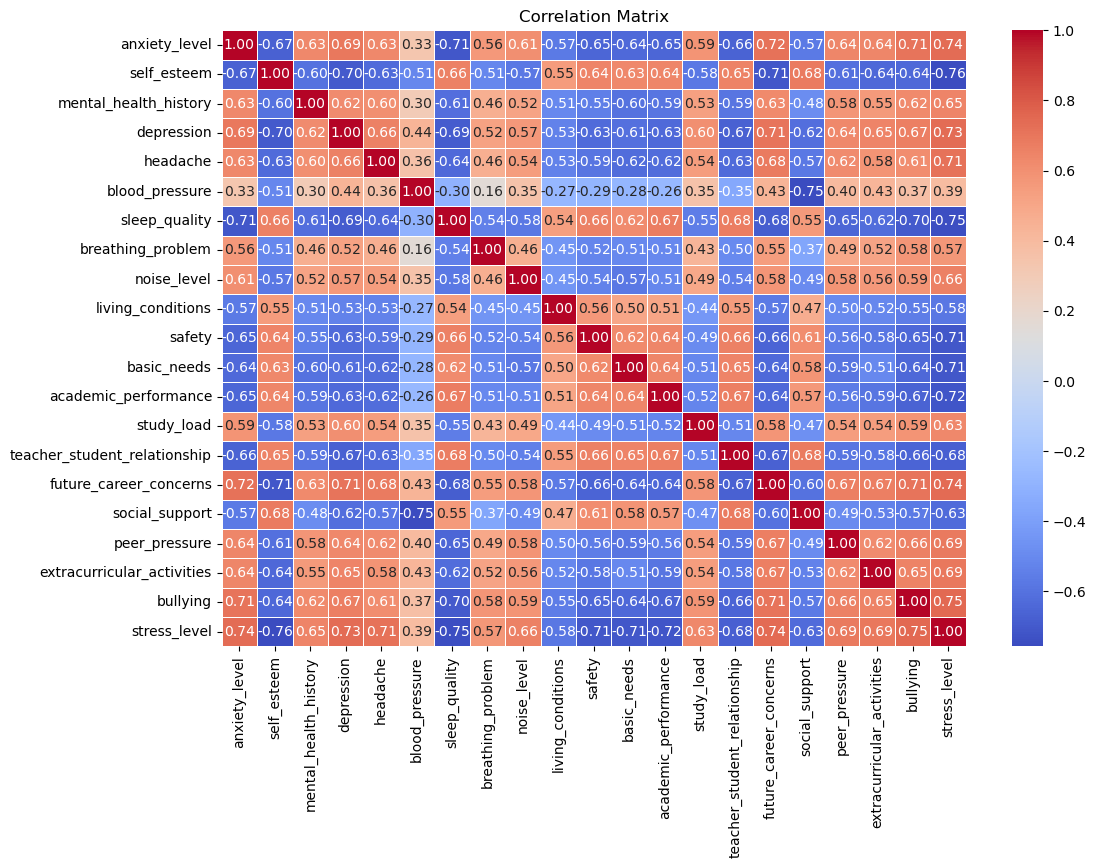

In [15]:
correlation_matrix = data.corr()



# Membuat heatmap

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')

plot_file_path = 'Corr_ment.png'
plt.savefig(plot_file_path, bbox_inches='tight')

plt.show()

In [16]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


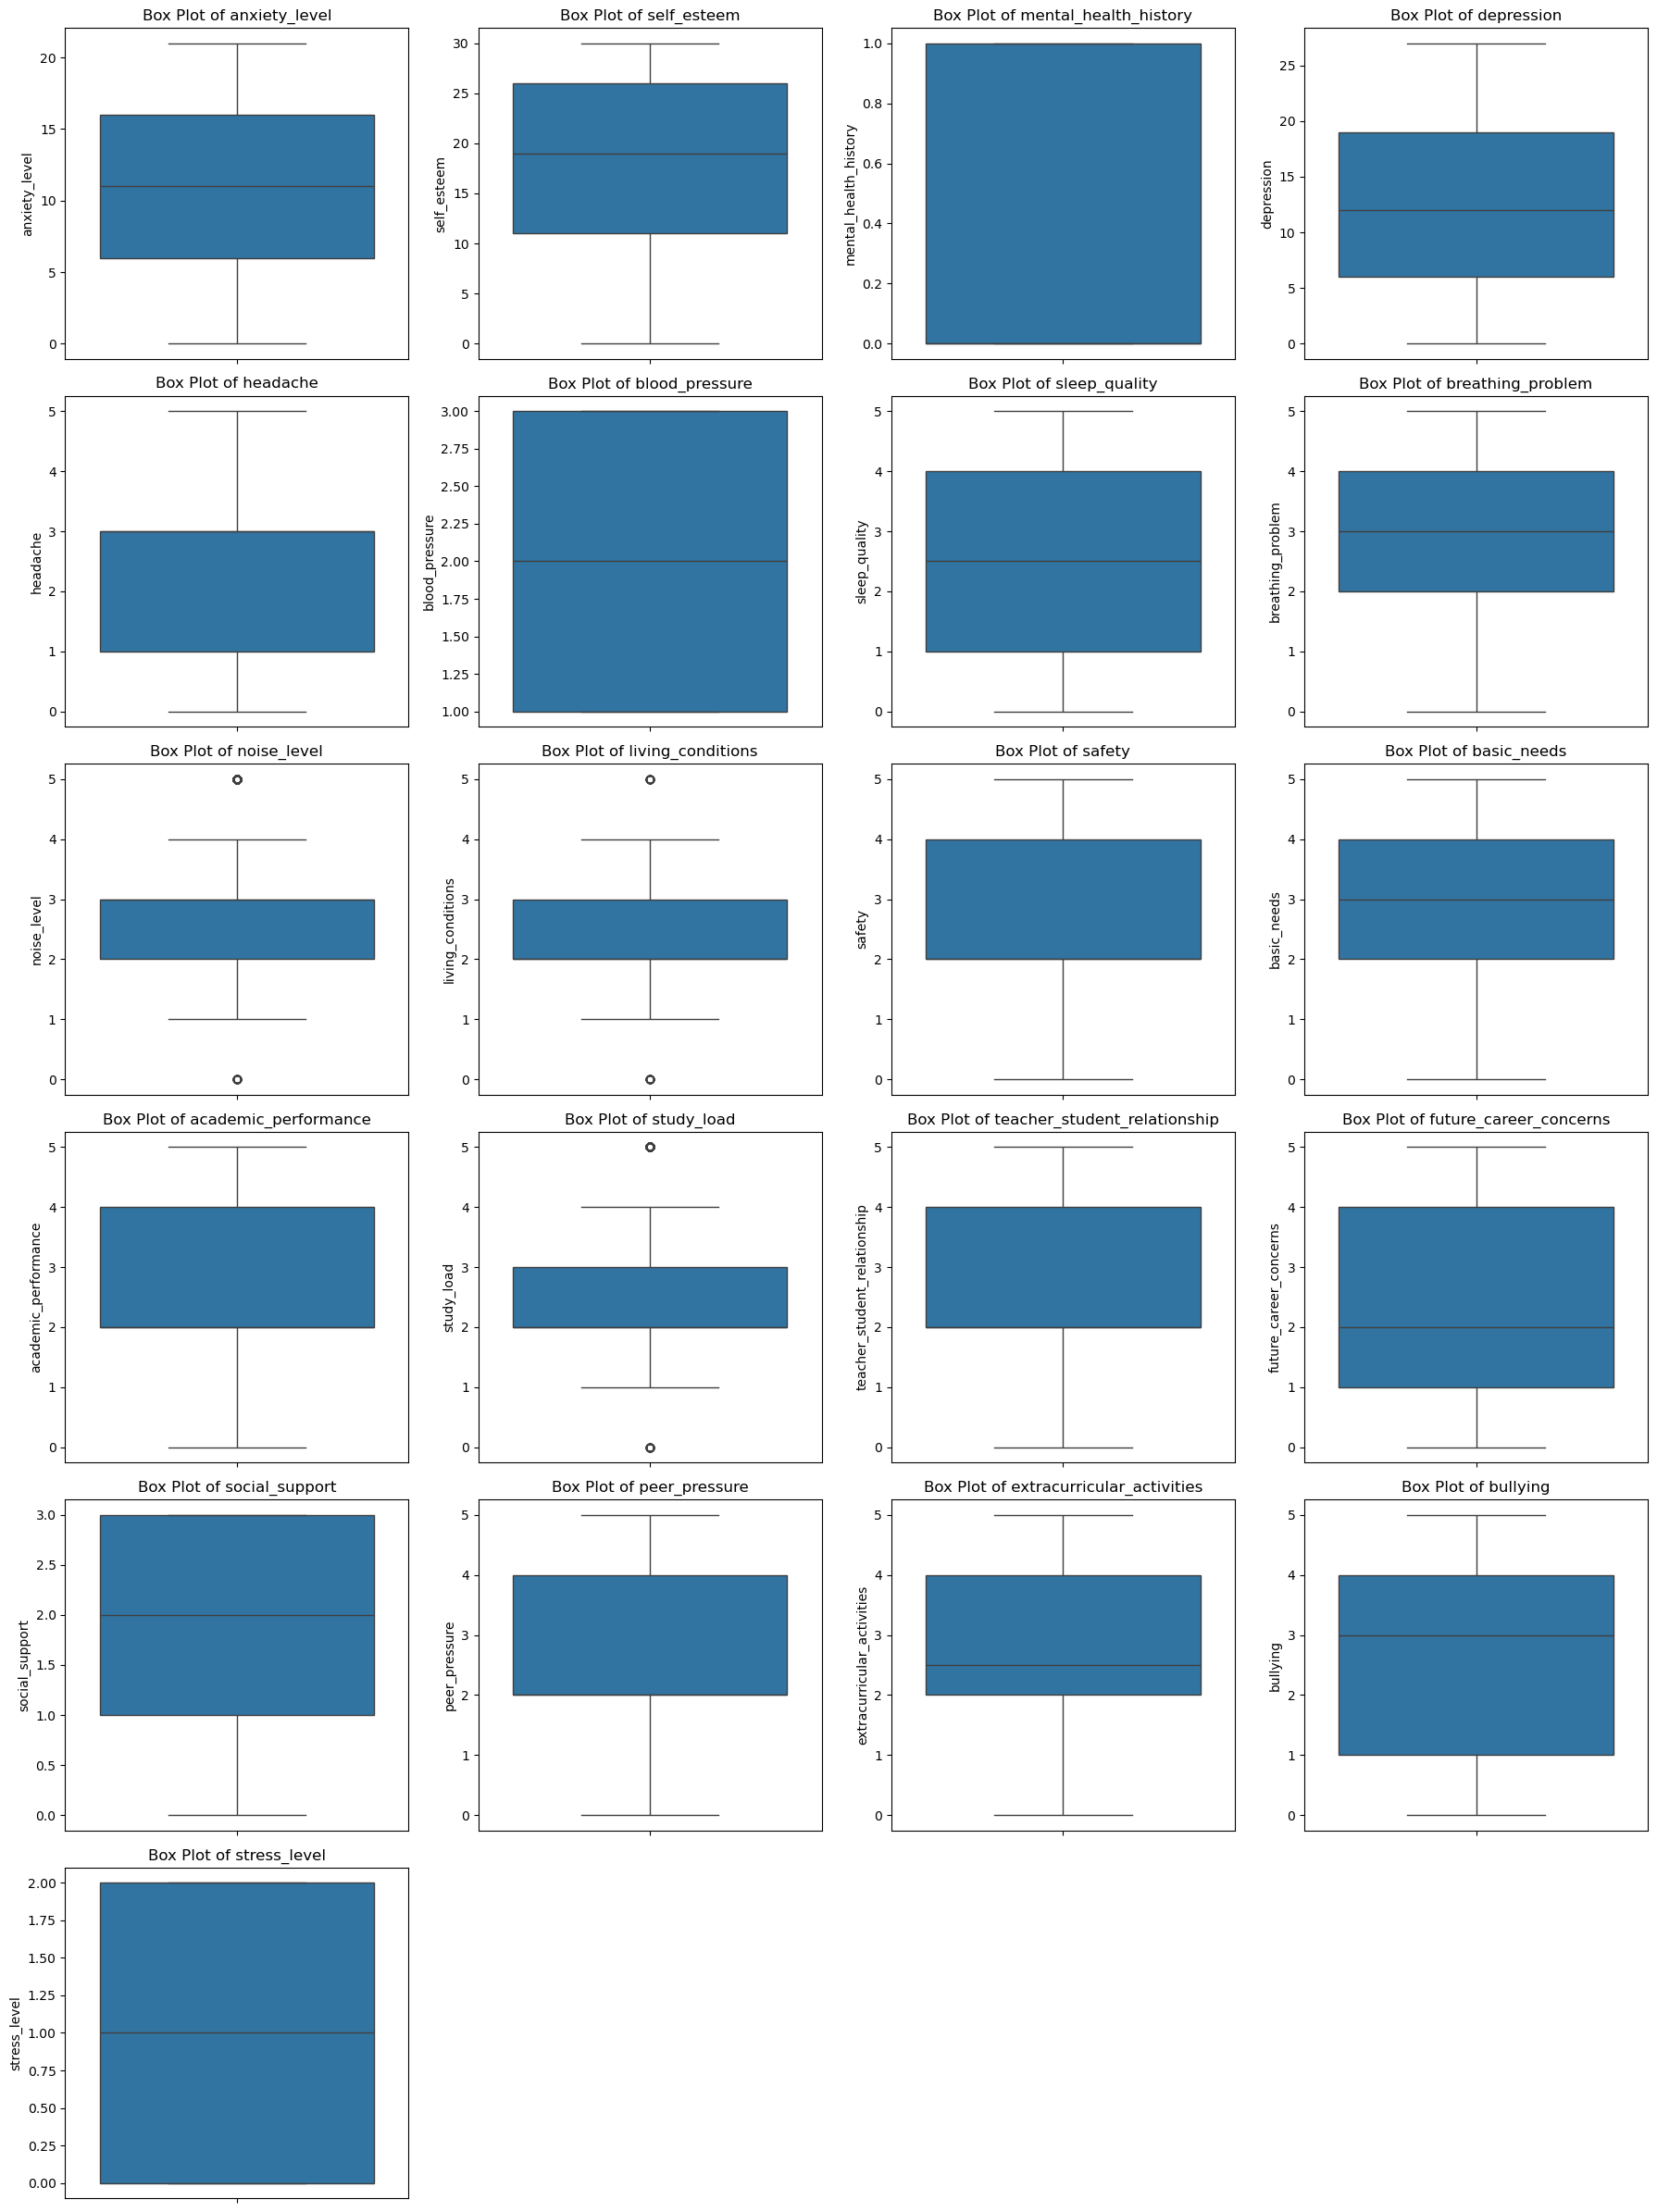

Plot saved to box_plots_distribution.png


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math





num_columns = len(data.columns)
num_rows = math.ceil(num_columns / 4)  

# Plot the distribution of every column using box plots
plt.figure(figsize=(18, 4 * num_rows))
for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 4, i)  
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

# Save the plot as an image file
plot_file_path = 'box_plots_distribution.png'
plt.savefig(plot_file_path, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved to {plot_file_path}")


Mean Squared Error: 11.150822226960742
R^2 Score: 0.7024552300060535


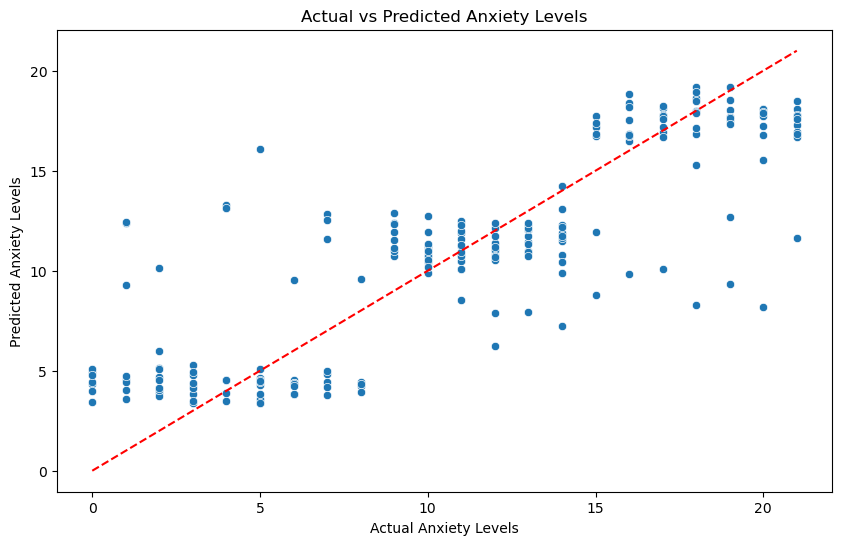

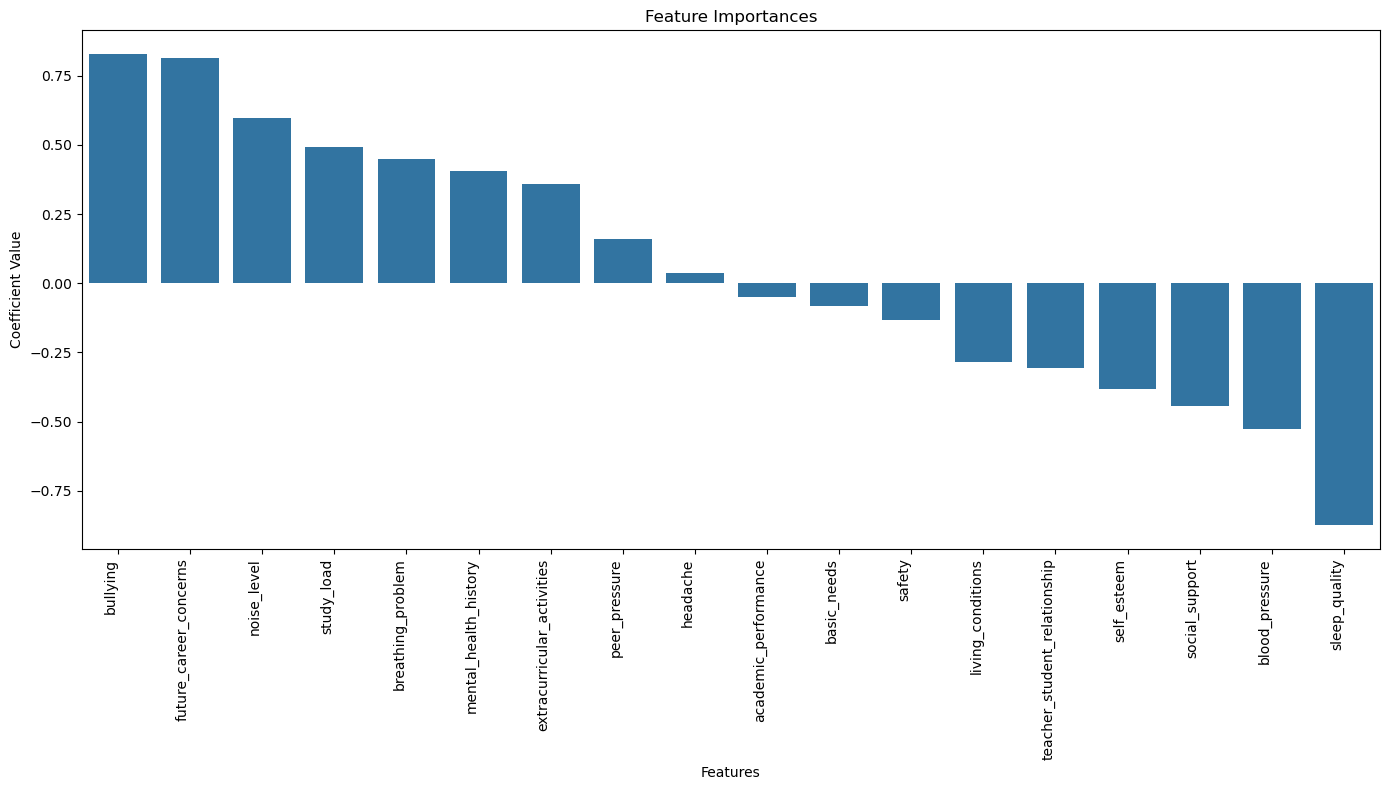

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
data_numeric = cleaned_data_super



# Drop 'depression' and 'stress_level' columns
data_numeric = data_numeric.drop(columns=['depression', 'stress_level'])

# Separate features and target variable
X = data_numeric.drop(columns=['anxiety_level'])
y = data_numeric['anxiety_level']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Anxiety Levels')
plt.ylabel('Predicted Anxiety Levels')
plt.title('Actual vs Predicted Anxiety Levels')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line for reference
plt.show()

# Plot feature importances
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importances')
plt.xticks(rotation=90, ha='right')  # Rotate x-tick labels for better visibility
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


Mean Squared Error: 27.30609042236015
R^2 Score: 0.5798683744997224


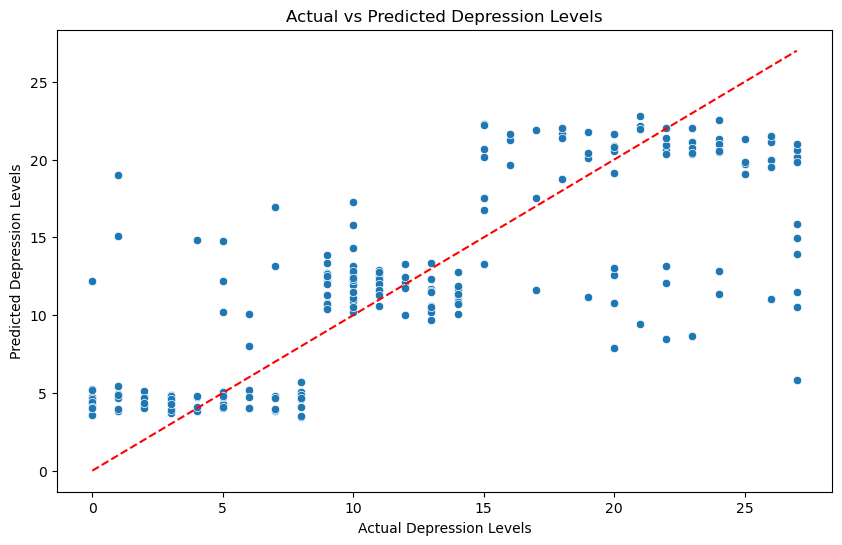

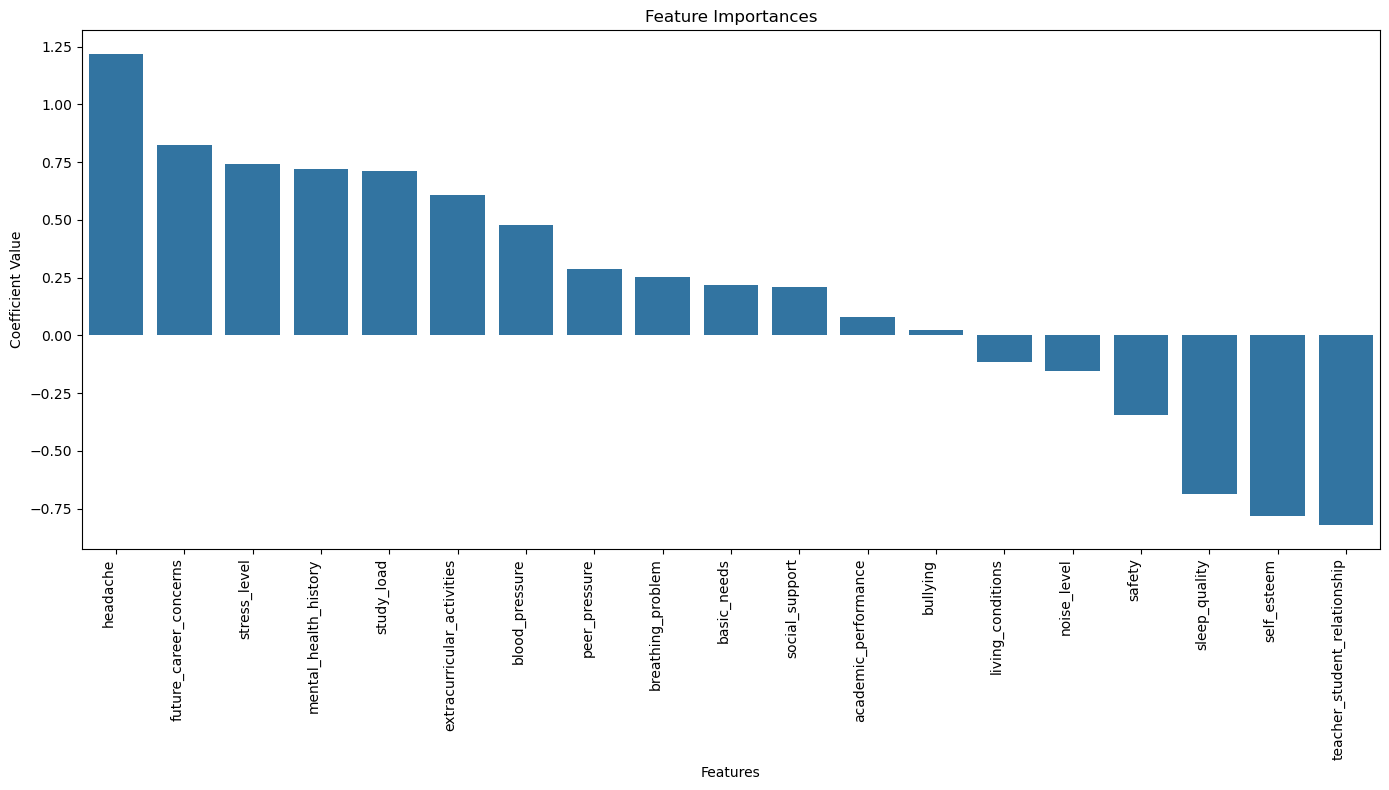

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
data_numeric = cleaned_data_super



# Ensure 'mental health history' is binary
data_numeric['mental_health_history'] = data_numeric['mental_health_history'].astype(int)

# Drop 'depression' and 'stress_level' columns
data_numeric = data_numeric.drop(columns=['anxiety_level'])

# Separate features and target variable
X = data_numeric.drop(columns=['depression'])
y = data_numeric['depression']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Depression Levels')
plt.ylabel('Predicted Depression Levels')
plt.title('Actual vs Predicted Depression Levels')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line for reference
plt.show()

# Plot feature importances
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importances')
plt.xticks(rotation=90, ha='right')  # Rotate x-tick labels for better visibility
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


Mean Squared Error: 28.06271029693921
R^2 Score: 0.6403001733114362


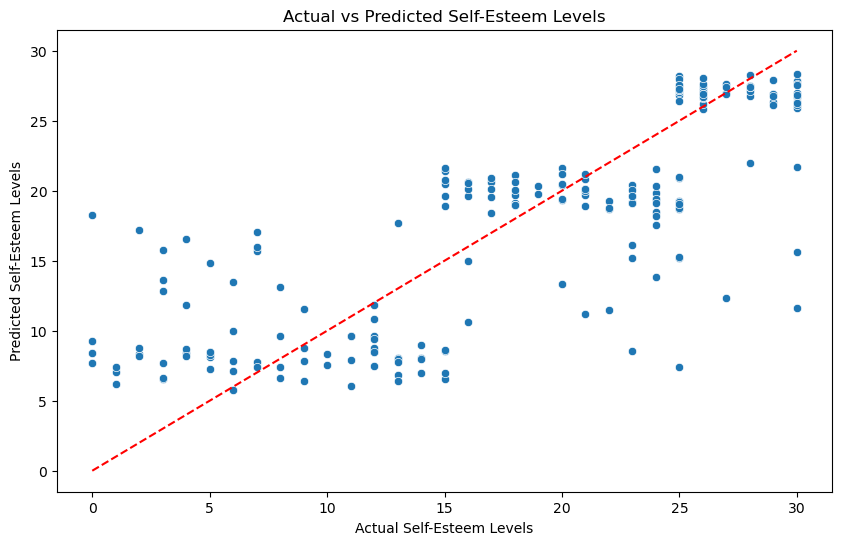

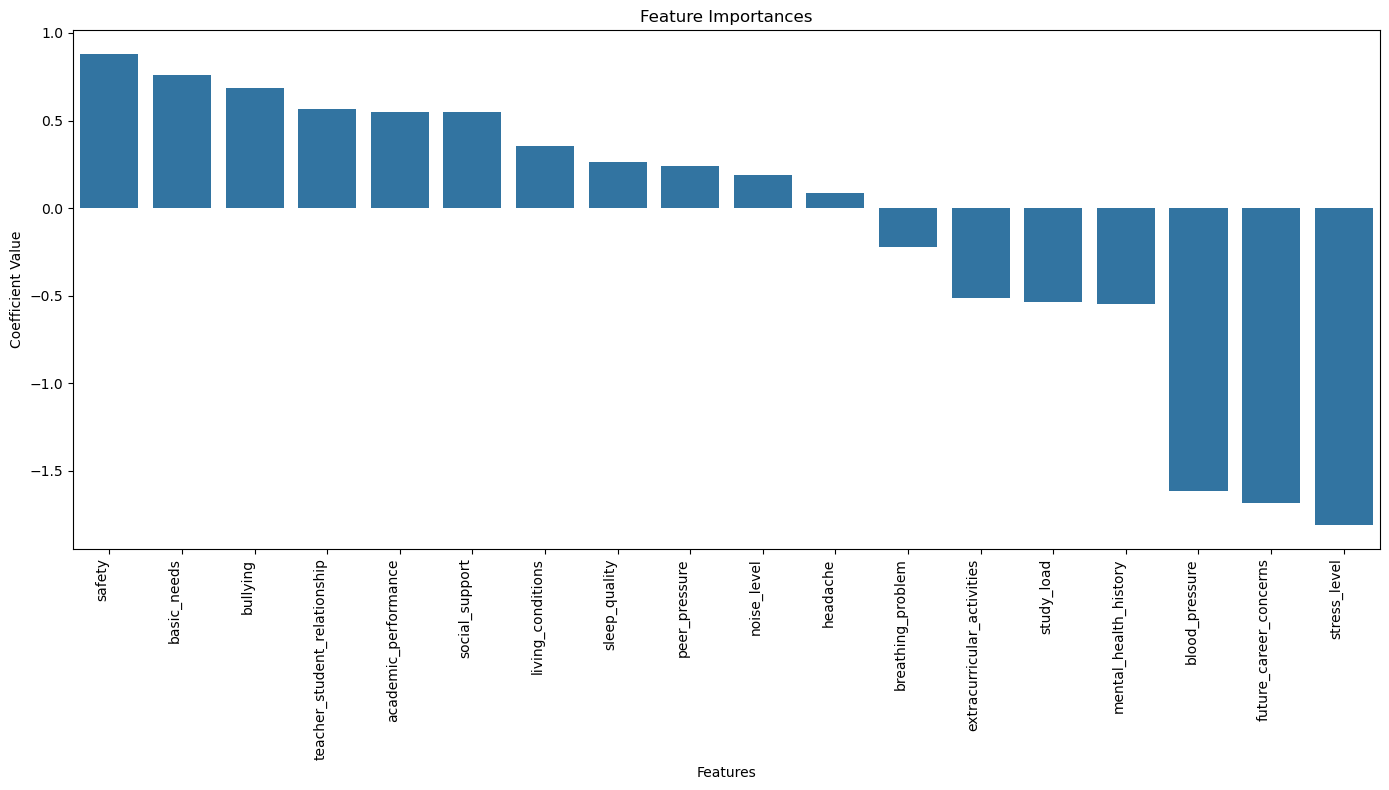

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
data_numeric = cleaned_data_super

# Ensure 'mental health history' is binary
data_numeric['mental_health_history'] = data_numeric['mental_health_history'].astype(int)

# Drop 'anxiety_level', 'depression', and 'stress_level' columns
data_numeric = data_numeric.drop(columns=['anxiety_level', 'depression'])

# Separate features and target variable
X = data_numeric.drop(columns=['self_esteem'])
y = data_numeric['self_esteem']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Self-Esteem Levels')
plt.ylabel('Predicted Self-Esteem Levels')
plt.title('Actual vs Predicted Self-Esteem Levels')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line for reference
plt.show()

# Plot feature importances
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importances')
plt.xticks(rotation=90, ha='right')  # Rotate x-tick labels for better visibility
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


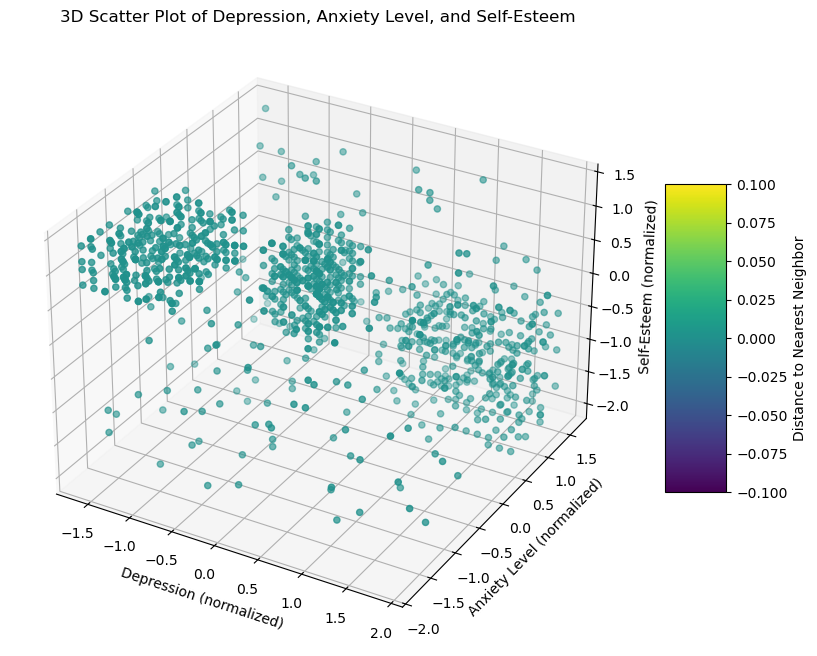

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame
data_numeric = cleaned_data_super



# Ensure 'mental health history' is binary
data_numeric['mental_health_history'] = data_numeric['mental_health_history'].astype(int)

# Select the columns of interest
data_plot = data_numeric[['depression', 'anxiety_level', 'self_esteem']]

# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_plot)

# Apply KNN clustering
n_neighbors = 5  # You can adjust the number of neighbors
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(data_scaled)
distances, indices = knn.kneighbors(data_scaled)

# Plot the results using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=distances[:, 0], cmap='viridis')

# Labels
ax.set_xlabel('Depression (normalized)')
ax.set_ylabel('Anxiety Level (normalized)')
ax.set_zlabel('Self-Esteem (normalized)')
ax.set_title('3D Scatter Plot of Depression, Anxiety Level, and Self-Esteem')

# Color bar
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Distance to Nearest Neighbor')

plt.show()


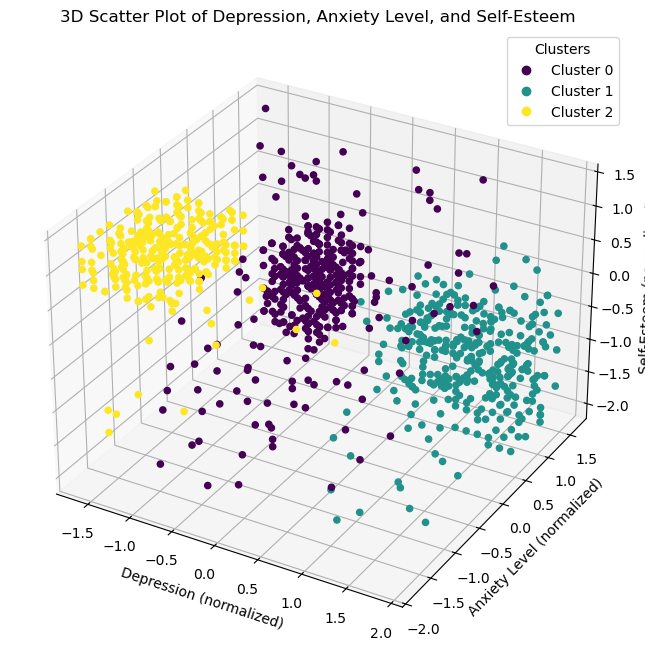

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame
data_numeric = cleaned_data_super



# Ensure 'mental health history' is binary
data_numeric['mental_health_history'] = data_numeric['mental_health_history'].astype(int)

# Select the columns of interest
data_plot = data_numeric[['depression', 'anxiety_level', 'self_esteem']]

# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_plot)

# Apply KMeans clustering
n_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Plot the results using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=cluster_labels, cmap='viridis', depthshade=False)

# Labels
ax.set_xlabel('Depression (normalized)')
ax.set_ylabel('Anxiety Level (normalized)')
ax.set_zlabel('Self-Esteem (normalized)')
ax.set_title('3D Scatter Plot of Depression, Anxiety Level, and Self-Esteem')

# Legend
legend_labels = [f'Cluster {i}' for i in range(n_clusters)]
plt.legend(handles=sc.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.show()


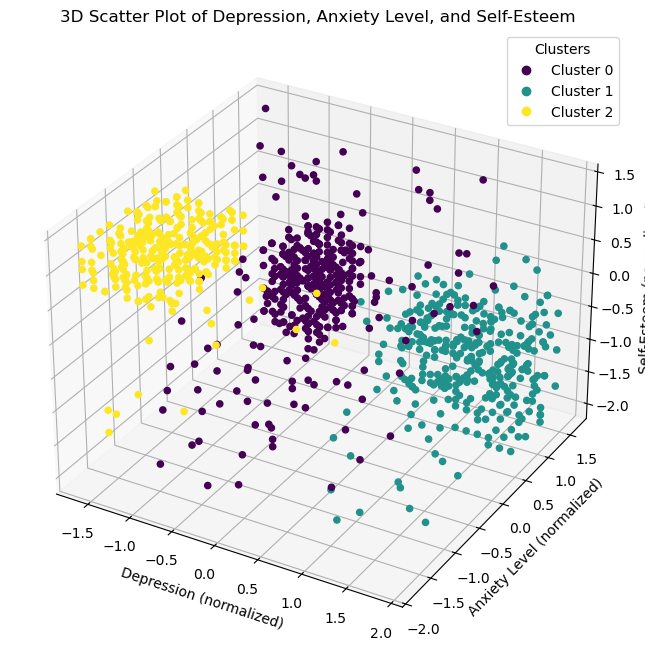

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,cluster
0,14,20,0,11,2,1,2,4,2,3,...,3,2,3,3,2,3,3,2,1,0
1,15,8,1,15,5,3,1,4,3,1,...,1,4,1,5,1,4,5,5,2,1
2,12,18,1,14,2,1,2,2,2,2,...,2,3,3,2,2,3,2,2,1,0
3,16,12,1,15,4,3,1,3,4,2,...,2,4,1,4,1,4,4,5,2,1
4,16,28,0,7,2,3,5,1,3,2,...,4,3,1,2,1,5,0,5,1,0


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame
data_numeric = cleaned_data_super



# Ensure 'mental health history' is binary
data_numeric['mental_health_history'] = data_numeric['mental_health_history'].astype(int)

# Select the columns of interest
data_plot = data_numeric[['depression', 'anxiety_level', 'self_esteem']]

# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_plot)

# Apply KMeans clustering
n_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original DataFrame
data_numeric['cluster'] = cluster_labels

# Plot the results using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=cluster_labels, cmap='viridis', depthshade=False)

# Labels
ax.set_xlabel('Depression (normalized)')
ax.set_ylabel('Anxiety Level (normalized)')
ax.set_zlabel('Self-Esteem (normalized)')
ax.set_title('3D Scatter Plot of Depression, Anxiety Level, and Self-Esteem')

# Legend
legend_labels = [f'Cluster {i}' for i in range(n_clusters)]
plt.legend(handles=sc.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.show()

# Display the updated DataFrame with cluster labels
data_numeric.head()


Accuracy: 0.9227272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        84
           1       0.93      0.89      0.91        64
           2       1.00      0.90      0.95        72

    accuracy                           0.92       220
   macro avg       0.93      0.92      0.92       220
weighted avg       0.93      0.92      0.92       220



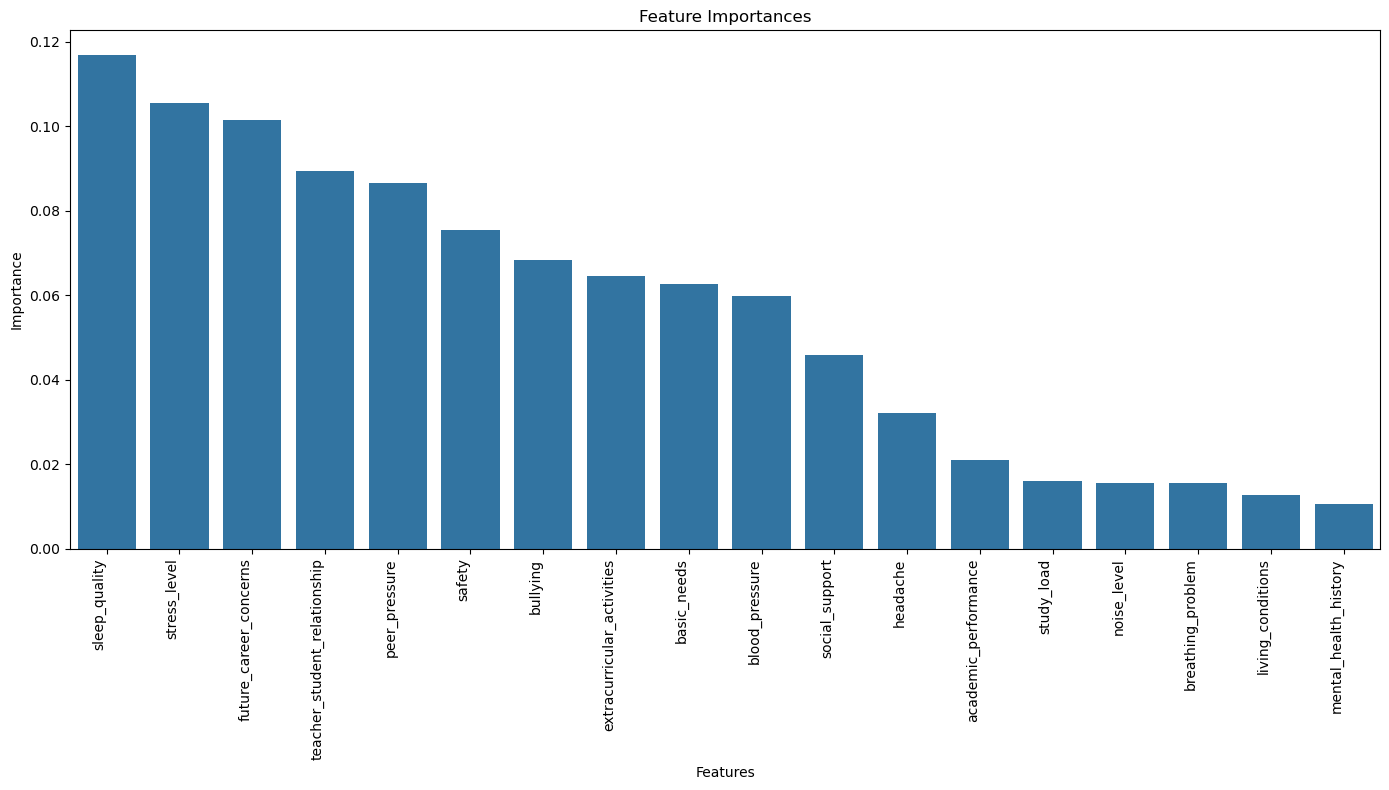

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is your DataFrame
data_numeric = cleaned_data_super


# Ensure 'mental health history' is binary
data_numeric['mental_health_history'] = data_numeric['mental_health_history'].astype(int)


X_scaled = data_numeric.drop(columns=['depression', 'anxiety_level', 'self_esteem', 'cluster'])



# Add the cluster labels to the original DataFrame
data_numeric['cluster'] = cluster_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cluster_labels, test_size=0.2, random_state=41)

# Train a RandomForestClassifier to predict the cluster labels
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Plot feature importances
feature_importances = pd.DataFrame(model.feature_importances_, X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90, ha='right')  # Rotate x-tick labels for better visibility
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


Accuracy: 0.9227272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        88
           1       0.92      0.86      0.89        66
           2       0.98      0.95      0.97        66

    accuracy                           0.92       220
   macro avg       0.93      0.92      0.92       220
weighted avg       0.92      0.92      0.92       220



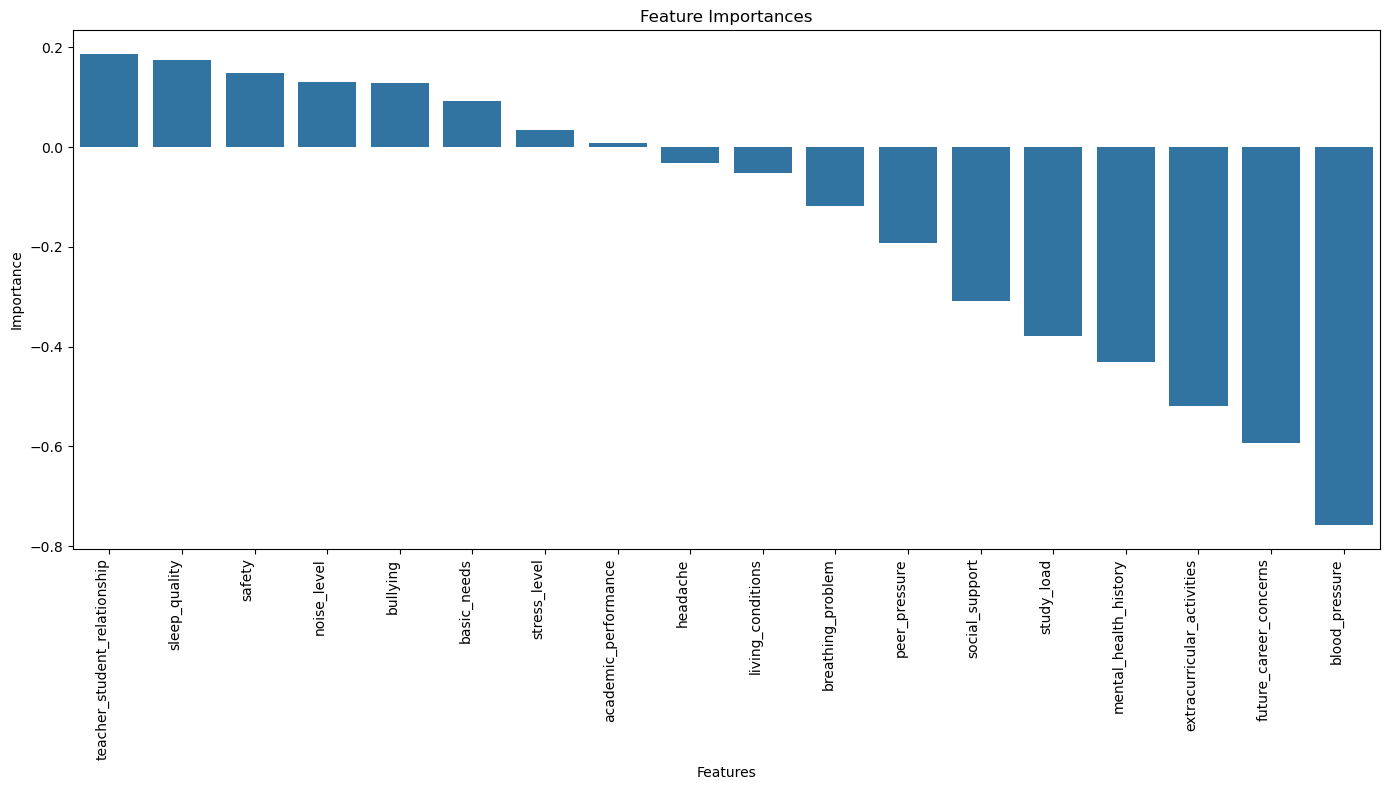

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# Assuming df is your DataFrame
data_numeric = cleaned_data_super



# Ensure 'mental health history' is binary
data_numeric['mental_health_history'] = data_numeric['mental_health_history'].astype(int)

# Drop 'depression', 'anxiety_level', and 'self_esteem' columns
X = data_numeric.drop(columns=['depression', 'anxiety_level', 'self_esteem','cluster'])

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Add the cluster labels to the original DataFrame
data_numeric['cluster'] = cluster_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cluster_labels, test_size=0.2, random_state=42)

# Train an SVM classifier to predict the cluster labels
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Plot feature importances (for SVM, we can use the coefficients of the linear kernel)
if hasattr(model, 'coef_'):
    feature_importances = pd.DataFrame(model.coef_[0], X.columns, columns=['Importance'])
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(14, 8))
    sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.xticks(rotation=90, ha='right')  
    plt.tight_layout()  
    plt.show()



Pearson Correlation Matrix:
               depression  anxiety_level  self_esteem
depression       1.000000       0.694340    -0.699602
anxiety_level    0.694340       1.000000    -0.672745
self_esteem     -0.699602      -0.672745     1.000000

Spearman Correlation Matrix:
               depression  anxiety_level  self_esteem
depression       1.000000       0.710606    -0.723546
anxiety_level    0.710606       1.000000    -0.697690
self_esteem     -0.723546      -0.697690     1.000000


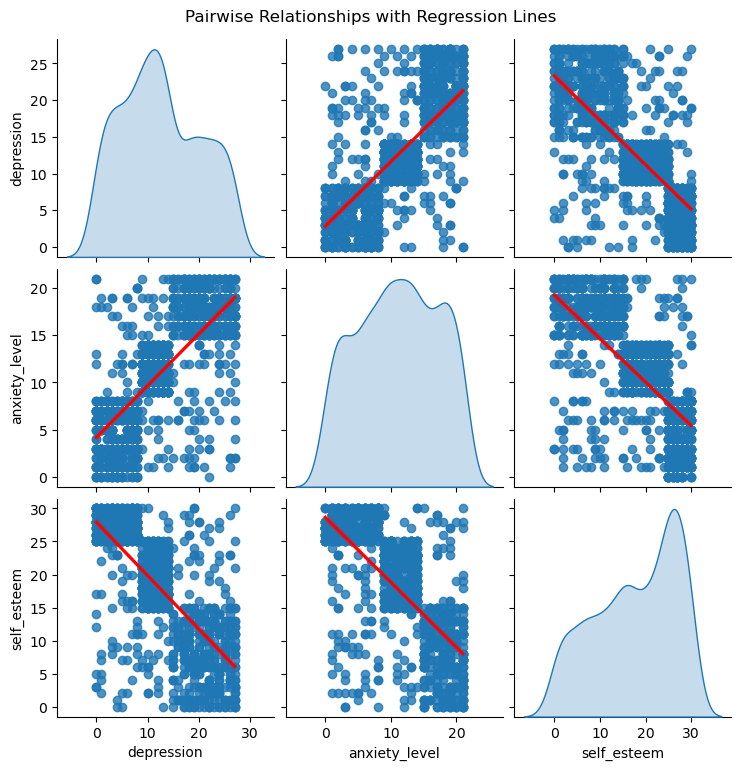

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = cleaned_data_super

# Select the columns of interest
data_corr = df[['depression', 'anxiety_level', 'self_esteem']]

# Compute Pearson correlation (linear)
pearson_corr = data_corr.corr(method='pearson')

# Compute Spearman correlation (nonlinear)
spearman_corr = data_corr.corr(method='spearman')

# Display the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Visualize the relationships using scatter plots with regression lines
sns.pairplot(data_corr, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairwise Relationships with Regression Lines', y=1.02)
plt.show()


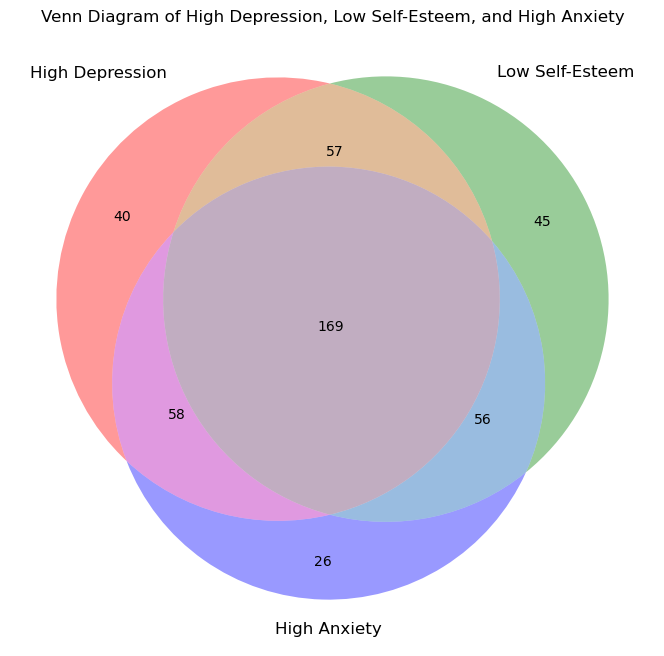

In [27]:
!pip install matplotlib-venn


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Assuming df is your DataFrame
df = cleaned_data_super

# Define thresholds
high_depression_threshold = df['depression'].quantile(0.7)
low_self_esteem_threshold = df['self_esteem'].quantile(0.3)
high_anxiety_threshold = df['anxiety_level'].quantile(0.7)

# Create subsets
high_depression = set(df[df['depression'] > high_depression_threshold].index)
low_self_esteem = set(df[df['self_esteem'] < low_self_esteem_threshold].index)
high_anxiety = set(df[df['anxiety_level'] > high_anxiety_threshold].index)

# Create Venn diagram
plt.figure(figsize=(10, 8))
venn = venn3([high_depression, low_self_esteem, high_anxiety],
             set_labels=('High Depression', 'Low Self-Esteem', 'High Anxiety'))

# Add titles and labels
plt.title('Venn Diagram of High Depression, Low Self-Esteem, and High Anxiety')
plt.show()
